## Intial Thoughts

So the Aim of this project is to explore the world happiness report from Kaggle that has data from 2015 to 2019 and use basic ML techniques.

We can build a prediction model, my first thought is on predicting the Happiness Score, but lets see after data exploration if thats the best Y value for prediction here.

This is the *[World Happiness Report Dataset](https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download)* on Kaggle.



# Todo Plan

In [4]:
# Rough TODOs and Steps.

# Data Collection / import + investigate what we have

# Data Cleaning pt 1 (only dealing with NaN values)

# Train/Test split - Seperate our Xtrain Xtest and Ytrain Ytest

# Data Visualization (look for patterns and further cleaning, outliers, fillin data possiblities)

# Data Cleaning pt 2 (filling in data values or adjusting outliers)

# Data Visualization (final check are we happy with our clean data)

# Exploratory Analysis (Correlations, trying to decide on features)

# Feature engineering - decide on best features and/or make new features if needed.

# Model building
 # Set a baseline with liner regression 

# Cross validate 

# Iterate on Model - try some different models or adjust features to see if we can get a better outcome.

# Pipeline - After our first setup we can then refactor some of our cleaning and feature engineering logic into a pipeline.


# Imports

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import missingno as msno

## Data Collection and import

Lets compare our files and years to see how much they differe in data structure.

In [14]:
# Put all your CSV filenames in a list
csv_files = [
    "./data/2015.csv",
    "./data/2016.csv",
    "./data/2017.csv",
    "./data/2018.csv",
    "./data/2019.csv"
]

# Read headers of the first file
base_headers = list(pd.read_csv(csv_files[0], nrows=1).columns)
print(f"Base headers (from {csv_files[0]}):\n{base_headers}\n")

# Compare against each other file
for file in csv_files[1:]:
    df = pd.read_csv(file, nrows=2)
    current_headers = list(df.columns)
    
    if current_headers == base_headers:
        print(f"✅ {file} matches the base headers.")
    else:
        print(f"❌ {file} has DIFFERENT headers:\n\n{current_headers}\n")
        display(df.head(2))
        # display(df.head(2).dtypes)



Base headers (from ./data/2015.csv):
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

❌ ./data/2016.csv has DIFFERENT headers:

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']



,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


❌ ./data/2017.csv has DIFFERENT headers:

['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']



,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


❌ ./data/2018.csv has DIFFERENT headers:

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


❌ ./data/2019.csv has DIFFERENT headers:

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


Our csv files appear to have different header naming and formats per year so Im going to work with the most recent data 2019.csv first. We can come back to trying different years later to see if it effects our results, or perhaps work on a multi year average.

In [35]:
df = pd.read_csv('./data/2019.csv')

display(df.head())

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Axes(0.125,0.11;0.698618x0.77)


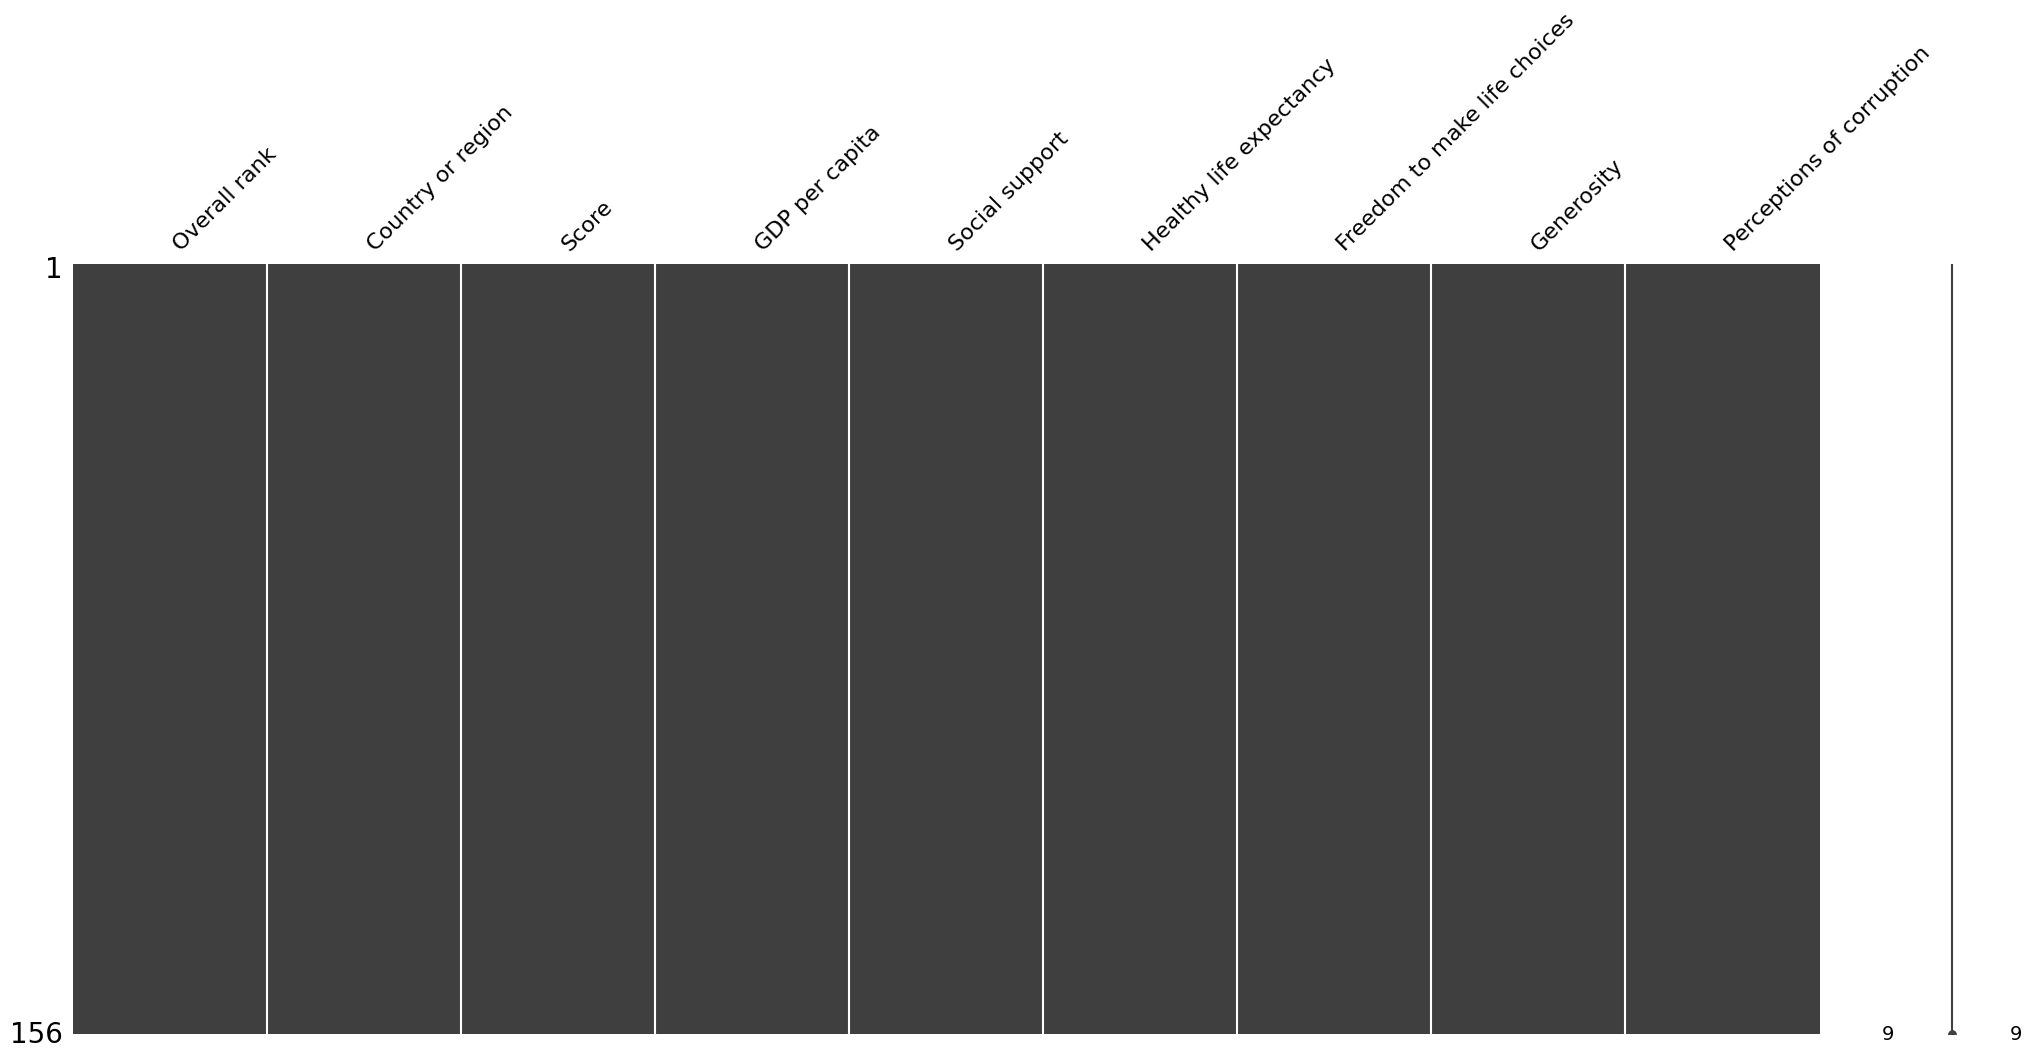

In [12]:
print(msno.matrix(df))

In [16]:
print(df.duplicated())
df.duplicated().unique()

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 156, dtype: bool


array([False])

In [17]:
df.shape

(156, 9)

In [19]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

So far it looks like we have no null values and no missing values from our data. 

In [37]:
# Show all rows that contain zero data, as I think this is our data that needs cleaning.
df[(df == 0).any(axis=1)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


On a Further check we do have some zero values in our data. Since there aren't that many I'm going to remove any rows that have zero values so we have a full dataset to work with.

The Last 2 columns could be correct. But the rest of this looks like data or missing data.

In [38]:
# Lets remove rows with any zeros in them.
print(df.shape)
df = df[~(df == 0).any(axis=1)]
print(df.shape)

(156, 9)
(150, 9)
